# Analyzing the Stroop Effect
#### By Isra Bazzar: Project done for Udacity data analysis Nanodegree
<br/><br/>
<span style="color:#aaa">
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.</span>


### (1) What is the independent variable? What is the dependent variable?

First of all; our study here will be a dependent t-test for (two conditions sample), i.e. each participant has two entries in the sample one for each condition, So this study will investigate the differences between congruent and incongruent records.

The dependent variable- outcome: is the one we are studying( records for each participant)
The independent variable- predictor: in our study here it's the type of words: congruent or incongruent) 

### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

According to the described variables, in this study we'll investigate how the type of words will affect the time record (Stroop effect)
<br/>
<b>Assumption:</b> the time record for congruent will be less than records for incongruent words, For this analysis we will try to prove this by assuming that the difference between the two records is zero(null hypothesis), and then we will reject this assumption using paired t- test  

<b> The null hypotheses(H0):</b> the mean of difference(Md) between time records for congruent records for incongruent is Zero
<br/>     <b>H0 : Md = 0</b>

<b>The alternative Hypothesis(HA) - which we hope to prove:</b> the mean difference between the time records for congruent words(Mc) will be incongruent(Mi) will ba greater than zero, 
<br/>      <b>HA: Md > 0</b>


### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [18]:
import statistics
import math
import csv

with open('stroopdata.csv') as csvfile:
    data = csv.reader(csvfile)
    incongruent = []
    congruent = []
    difference = []
    
    first_row = next(data) # this is to neglect the first row since it's column names 
    for row in data:
        #Incongruent time record
        xi = float(row[1])
        #Congruent time record
        xc = float(row[0])

        incongruent.append(xi)
        congruent.append(xc)
        
        # Find the difference for each entry 
        difference.append(xi - xc)

    # Measure Of Center Tendency  
    #find the sample mean for incongruent and congruent and round it to 2 decimal places
    MI = round(statistics.mean(incongruent), 2)
    MC = round(statistics.mean(congruent), 2)
    # Find the difference mean
    MD = round((MI - MC), 2)

    # Measure Of Spread
    #find the sample standard deviation for incongruent and congruent sample and round it to 2 decimal places
    SDI = round(statistics.stdev(incongruent), 2)
    SDC = round(statistics.stdev(congruent), 2)
    SDD = round(statistics.stdev(difference), 2)
    
    #calculate the standard deviation of the mean difference
    n = 24
    SE = round(SDD / math.sqrt(n), 2)
    #print results
    print("Incongruent records:\n MI = ", str(MI), ", SDI = ", str(SDI))
    print("Congruent records:\n MC = ", str(MC), ", SDC = ", str(SDC))
    
    print("Difference:\n Difference Mean = ", str(MD), ",Difference standard deviation = ", str(SDD))
    print(" Standard Error of the mean difference = ", str(SE))
    
   

Incongruent records:
 MI =  22.02 , SDI =  4.8
Congruent records:
 MC =  14.05 , SDC =  3.56
Difference:
 Difference Mean =  7.97 ,Difference standard deviation =  4.86
 Standard Error of the mean difference =  0.99


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

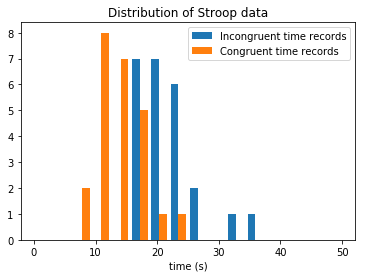

In [20]:
# Build the visualizations here
import matplotlib.pyplot as plt


plt.hist([incongruent, congruent],bins=int(50/3), range=(0,50), label=['Incongruent time records', 'Congruent time records'])
plt.legend(loc='upper right')

plt.title('Distribution of Stroop data')
plt.xlabel('time (s)')
plt.show()


As shown above; I have implemented the stroop test data using a histogram with bin size = 3, 
looking at the distribution of both data we can notice the following:

-The shape for both distributions is almost the same, and it's almost left sided histogram <br/><br/>

-The center for blue distribution(Incongruent records) is almost bigger than the orange(congruent) distribution's center, which may be means that we will reject the null hypothesis if this diffirence is significant;
Below we will investigate this using numbers to see if we will reject or retain the null hypothesis


### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [22]:
# Perform the statistical test here 
# Paired t-Test 

t = MD / SE
print("t(Md) = ",str(t))

t(Md) =  8.05050505050505


Since we don't have the population data, and it's only a sample to be investigated, <b>double t-Test</b> is the choice.

Selecting alpha level (a = 0.05); <br/> since sample size(n) = 24 >> Degrees of freedom = n-1 = 23 <br/> Using t-table, we got <b>critical t = 2.069 </b>

For Md(Mu for differences) --> t = Md / SE = 8.051

##### Conclusion
<b>t Value of 8.051 is too way bigger than the t critical value(2.069) 
<br/> 
    Calculating P-value for t=8.051 and  DF=23   
    <span style=" color:red">The two-tailed P value is less than 0.0001 </span>
   By conventional criteria(comparing to our alpha = 0.05), this difference is considered to be extremely statistically significant. 
 > which proves that we can surely reject the null hypothesis, and proves our assumption described above(The stroop effect)
    --> In other words: In general, Most probably One person will record less time to say loud the color word ink with congruent words than with incongruent words</b> 


### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Okay, based on the project title I think it's the perceptual phenomenon ;) But doing some search this phenomenon can be described by the statement(Seeing is decieving), it discusses the psychology illusions and it's effect on decisions and conclusions that human's mind make. [source 1](https://science.sciencemag.org/content/204/4400/1402.1)

"A perceptual illusion differs from a strictly optical illusion, which is essentially an image that contains conflicting data that causes you to perceive the image in a way that differs from reality. Optical illusions typically work by using certain visual tricks that exploit certain assumptions within human perception -- in essence, the image itself is the illusion. A perceptual illusion, however, is not an optical phenomenon, but rather a cognitive one. The illusion occurs in the way your brain processes the visual data you transmit to your brain." [source 2](https://sciencing.com/perceptual-illusions-8378599.html)



